# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import tqdm

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

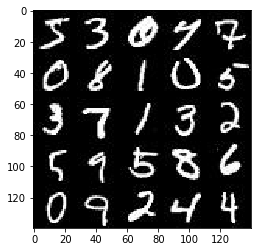

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

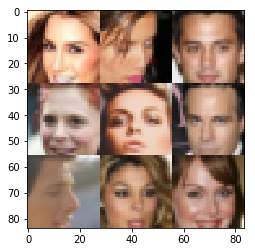

In [3]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs   = tf.placeholder(tf.float32, [None,image_width, image_height, image_channels],
                                   name= 'real_inputs')
    
    z_inputs      = tf.placeholder(tf.float32, [None,z_dim],name= 'z_inputs')
    
    learning_rate = tf.placeholder(tf.float32, name= 'lr')
    
    return real_inputs, z_inputs, learning_rate

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):

    """
    :Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # shuld return prob for img x to be from the original data
    # make some noraml distribution
    rnd =  tf.contrib.layers.xavier_initializer_conv2d()
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #>>> conv 28*28->14*14->7*7->4*4 
        #dim = images.shape[1]
        #print (dim)
        
        lyr1  = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=rnd)
        relu1 = tf.nn.relu(lyr1)       
      
        lyr2  = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=rnd)
        lyr2  = tf.layers.batch_normalization(lyr2, training=True)
        relu2 = tf.nn.relu(lyr2)   
        
        lyr3  = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=rnd)
        lyr3  = tf.layers.batch_normalization(lyr3, training=True)
        relu3 = tf.nn.relu(lyr3)
               
        
        flat   = tf.reshape(relu3, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        out    = tf.sigmoid(logits)
        
        return out, logits 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    rnd =  tf.contrib.layers.xavier_initializer_conv2d()
    # reuse only on prediction
    with tf.variable_scope('generator', reuse = not is_train):
        # Fully connected layer
        lyr1 = tf.layers.dense(z, 7*7*512)
        
        lyr1 = tf.reshape(lyr1, (-1, 7,7,512))
        lyr1 = tf.layers.batch_normalization(lyr1, training=is_train)
        lyr1 = tf.nn.relu(lyr1)
        # 7x7x512
        
        lyr2 = tf.layers.conv2d_transpose(lyr1, 256, 5, strides=2, padding='same', 
                                          kernel_initializer=rnd)
        lyr2 = tf.layers.batch_normalization(lyr2, training=is_train)
        lyr2 = tf.nn.relu(lyr2)
        # 14x14x256
        
        lyr3 = tf.layers.conv2d_transpose(lyr2, 128, 5, strides=2, padding='same', 
                              kernel_initializer=rnd)
        lyr3 = tf.layers.batch_normalization(lyr3, training=is_train)
        lyr3 = tf.nn.relu(lyr3)
        # 28x28x128
        
        logits = tf.layers.conv2d_transpose(lyr3, out_channel_dim, 3, strides=1, padding='same', 
                              kernel_initializer=rnd)
        # 28x28xout_channel_dim
        
        output = tf.tanh(logits)
    
    return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    # ones=real
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    # zeros=fake
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    # ones=real
    g_loss      = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1904... Generator Loss: 1.1098
Epoch 1/2... Discriminator Loss: 1.5850... Generator Loss: 0.5601
Epoch 1/2... Discriminator Loss: 1.6617... Generator Loss: 0.5362
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 0.6981
Epoch 1/2... Discriminator Loss: 1.7538... Generator Loss: 0.3348
Epoch 1/2... Discriminator Loss: 1.7584... Generator Loss: 0.3286
Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 0.7288
Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.6842
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 0.8616
Epoch 1/2... Discriminator Loss: 1.3506... Generator Loss: 1.2584


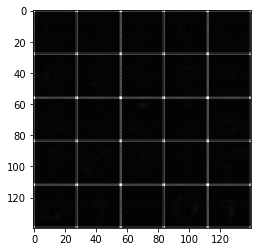

Epoch 1/2... Discriminator Loss: 1.4270... Generator Loss: 1.3039
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 1.3154
Epoch 1/2... Discriminator Loss: 1.3235... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 1.3829... Generator Loss: 0.5818
Epoch 1/2... Discriminator Loss: 1.6000... Generator Loss: 0.4288
Epoch 1/2... Discriminator Loss: 1.4224... Generator Loss: 0.6096
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.6407
Epoch 1/2... Discriminator Loss: 1.8889... Generator Loss: 0.3023
Epoch 1/2... Discriminator Loss: 0.7732... Generator Loss: 1.8181
Epoch 1/2... Discriminator Loss: 1.2870... Generator Loss: 1.0151


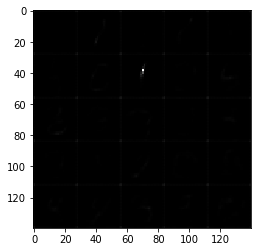

Epoch 1/2... Discriminator Loss: 1.2544... Generator Loss: 0.8308
Epoch 1/2... Discriminator Loss: 1.3845... Generator Loss: 0.9204
Epoch 1/2... Discriminator Loss: 1.2854... Generator Loss: 0.7240
Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 0.7774
Epoch 1/2... Discriminator Loss: 1.3634... Generator Loss: 0.5619
Epoch 1/2... Discriminator Loss: 1.2566... Generator Loss: 0.8544
Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 1.3715... Generator Loss: 0.6170
Epoch 1/2... Discriminator Loss: 1.3354... Generator Loss: 0.5502
Epoch 1/2... Discriminator Loss: 1.2712... Generator Loss: 0.5871


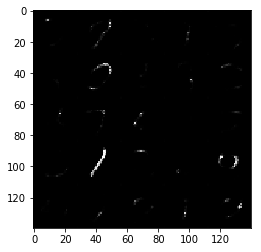

Epoch 1/2... Discriminator Loss: 1.2959... Generator Loss: 0.8415
Epoch 1/2... Discriminator Loss: 1.2405... Generator Loss: 0.9332
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 1.1266
Epoch 1/2... Discriminator Loss: 1.3516... Generator Loss: 0.8049
Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 0.9567
Epoch 1/2... Discriminator Loss: 1.3660... Generator Loss: 0.7333
Epoch 1/2... Discriminator Loss: 1.3743... Generator Loss: 0.5583
Epoch 1/2... Discriminator Loss: 1.1531... Generator Loss: 0.9028
Epoch 1/2... Discriminator Loss: 1.3228... Generator Loss: 0.6751
Epoch 1/2... Discriminator Loss: 1.3052... Generator Loss: 0.8503


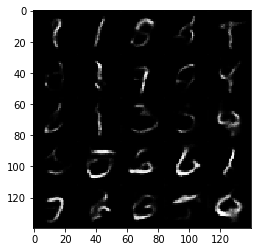

Epoch 1/2... Discriminator Loss: 1.3020... Generator Loss: 1.0834
Epoch 1/2... Discriminator Loss: 0.9926... Generator Loss: 1.3988
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.8014
Epoch 1/2... Discriminator Loss: 1.3015... Generator Loss: 0.8415
Epoch 1/2... Discriminator Loss: 1.2734... Generator Loss: 0.8574
Epoch 1/2... Discriminator Loss: 1.4824... Generator Loss: 0.4900
Epoch 2/2... Discriminator Loss: 1.4635... Generator Loss: 0.6502
Epoch 2/2... Discriminator Loss: 1.4641... Generator Loss: 0.4825
Epoch 2/2... Discriminator Loss: 1.4129... Generator Loss: 0.5844
Epoch 2/2... Discriminator Loss: 1.4522... Generator Loss: 0.5170


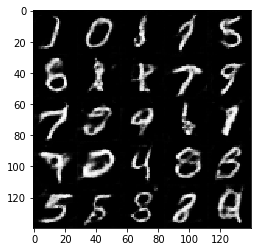

Epoch 2/2... Discriminator Loss: 1.2808... Generator Loss: 0.7505
Epoch 2/2... Discriminator Loss: 1.3854... Generator Loss: 1.0094
Epoch 2/2... Discriminator Loss: 1.4000... Generator Loss: 1.1213
Epoch 2/2... Discriminator Loss: 1.5042... Generator Loss: 0.4705
Epoch 2/2... Discriminator Loss: 1.3651... Generator Loss: 0.6171
Epoch 2/2... Discriminator Loss: 1.3407... Generator Loss: 0.6044
Epoch 2/2... Discriminator Loss: 1.2819... Generator Loss: 0.6058
Epoch 2/2... Discriminator Loss: 1.2948... Generator Loss: 0.7527
Epoch 2/2... Discriminator Loss: 1.3465... Generator Loss: 0.7144
Epoch 2/2... Discriminator Loss: 1.2892... Generator Loss: 0.6719


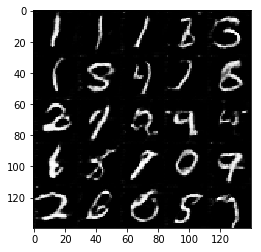

Epoch 2/2... Discriminator Loss: 1.3246... Generator Loss: 0.7272
Epoch 2/2... Discriminator Loss: 1.3458... Generator Loss: 0.5938
Epoch 2/2... Discriminator Loss: 1.3514... Generator Loss: 0.7191
Epoch 2/2... Discriminator Loss: 1.3474... Generator Loss: 1.0458
Epoch 2/2... Discriminator Loss: 1.2754... Generator Loss: 1.0248
Epoch 2/2... Discriminator Loss: 1.3421... Generator Loss: 0.8436
Epoch 2/2... Discriminator Loss: 1.3190... Generator Loss: 0.9834
Epoch 2/2... Discriminator Loss: 1.3116... Generator Loss: 0.9340
Epoch 2/2... Discriminator Loss: 1.4176... Generator Loss: 0.5693
Epoch 2/2... Discriminator Loss: 1.4110... Generator Loss: 0.6021


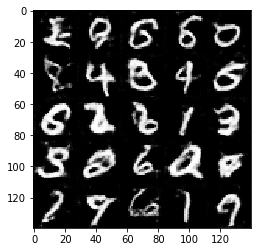

Epoch 2/2... Discriminator Loss: 1.4070... Generator Loss: 0.5496
Epoch 2/2... Discriminator Loss: 1.4493... Generator Loss: 0.4792
Epoch 2/2... Discriminator Loss: 1.3614... Generator Loss: 0.6168
Epoch 2/2... Discriminator Loss: 1.5300... Generator Loss: 0.7141
Epoch 2/2... Discriminator Loss: 1.5435... Generator Loss: 0.4483
Epoch 2/2... Discriminator Loss: 1.3943... Generator Loss: 0.5151
Epoch 2/2... Discriminator Loss: 1.4495... Generator Loss: 0.5007
Epoch 2/2... Discriminator Loss: 1.3910... Generator Loss: 0.6303
Epoch 2/2... Discriminator Loss: 1.3422... Generator Loss: 0.6102
Epoch 2/2... Discriminator Loss: 1.2995... Generator Loss: 1.0280


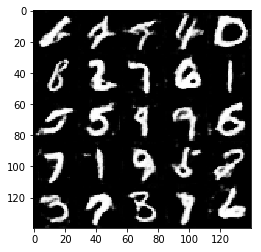

Epoch 2/2... Discriminator Loss: 1.3258... Generator Loss: 1.0035
Epoch 2/2... Discriminator Loss: 1.3243... Generator Loss: 1.0536
Epoch 2/2... Discriminator Loss: 1.3196... Generator Loss: 0.6433
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.7878
Epoch 2/2... Discriminator Loss: 1.2582... Generator Loss: 0.7721
Epoch 2/2... Discriminator Loss: 1.3474... Generator Loss: 0.6836
Epoch 2/2... Discriminator Loss: 1.4702... Generator Loss: 0.5035
Epoch 2/2... Discriminator Loss: 1.2154... Generator Loss: 0.8981
Epoch 2/2... Discriminator Loss: 1.2942... Generator Loss: 1.2077
Epoch 2/2... Discriminator Loss: 1.3658... Generator Loss: 0.7651


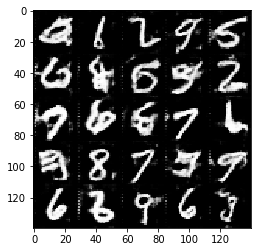

Epoch 2/2... Discriminator Loss: 1.3996... Generator Loss: 0.9956
Epoch 2/2... Discriminator Loss: 1.3567... Generator Loss: 1.1514
Epoch 2/2... Discriminator Loss: 1.3339... Generator Loss: 1.0288


In [12]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3932... Generator Loss: 4.9934
Epoch 1/1... Discriminator Loss: 0.5720... Generator Loss: 2.2354
Epoch 1/1... Discriminator Loss: 0.7305... Generator Loss: 1.4828
Epoch 1/1... Discriminator Loss: 0.7254... Generator Loss: 1.5786
Epoch 1/1... Discriminator Loss: 0.6375... Generator Loss: 4.2322
Epoch 1/1... Discriminator Loss: 0.4643... Generator Loss: 2.4531
Epoch 1/1... Discriminator Loss: 0.6232... Generator Loss: 1.7678
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 1.2800
Epoch 1/1... Discriminator Loss: 2.7417... Generator Loss: 3.9192
Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 1.2751


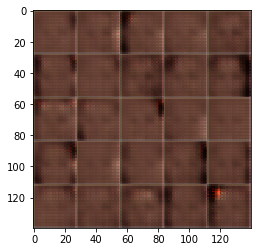

Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.9210
Epoch 1/1... Discriminator Loss: 1.0964... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.0712
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 1.5164
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 1.0227
Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 1.3297


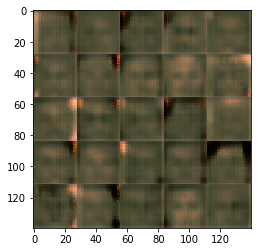

Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 1.0079
Epoch 1/1... Discriminator Loss: 1.1263... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 0.7596
Epoch 1/1... Discriminator Loss: 1.1545... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.9060


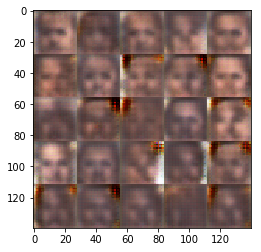

Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 1.3984
Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 1.2055... Generator Loss: 0.8820
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 1.2176
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 1.2238
Epoch 1/1... Discriminator Loss: 1.4365... Generator Loss: 1.5352
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.8613


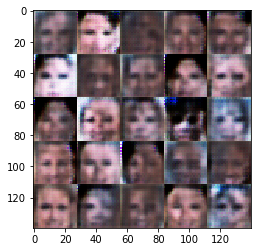

Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 1.4856
Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.4692
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.5465
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.9836
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.9346
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.2676... Generator Loss: 1.5882
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 0.7534


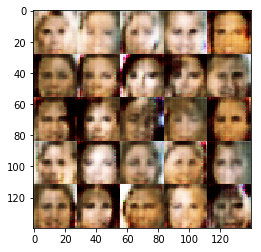

Epoch 1/1... Discriminator Loss: 1.7757... Generator Loss: 2.1129
Epoch 1/1... Discriminator Loss: 1.1035... Generator Loss: 1.0671
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 1.4426
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 1.2930
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 1.0587... Generator Loss: 1.2587


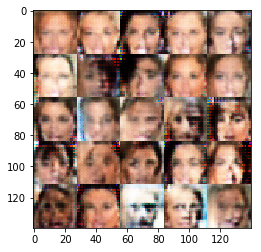

Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.5835
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 1.2685
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 1.3444
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.9198
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 1.0749
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.7479
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.5673... Generator Loss: 0.4409
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.6131


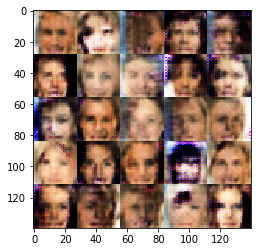

Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.5210
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.1835... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.8337
Epoch 1/1... Discriminator Loss: 1.0839... Generator Loss: 1.0028
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.6453
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.8234
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.8867
Epoch 1/1... Discriminator Loss: 1.1141... Generator Loss: 0.9498


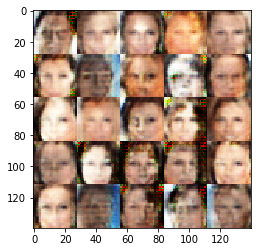

Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 1.0716
Epoch 1/1... Discriminator Loss: 1.3020... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.9947
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.9185
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.8639


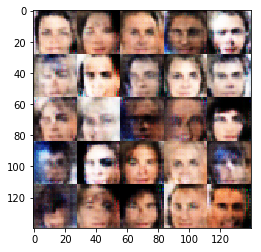

Epoch 1/1... Discriminator Loss: 1.1257... Generator Loss: 1.1034
Epoch 1/1... Discriminator Loss: 1.4560... Generator Loss: 1.0493
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.0276... Generator Loss: 1.0234
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.5514
Epoch 1/1... Discriminator Loss: 1.2159... Generator Loss: 0.9279
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.8044
Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 1.1460


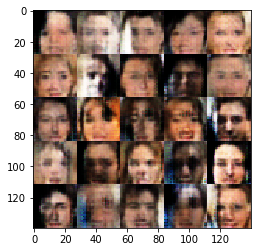

Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 1.5320
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 1.0025
Epoch 1/1... Discriminator Loss: 1.4761... Generator Loss: 0.5294
Epoch 1/1... Discriminator Loss: 1.2895... Generator Loss: 0.9098
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 1.4094
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.5314
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.6536


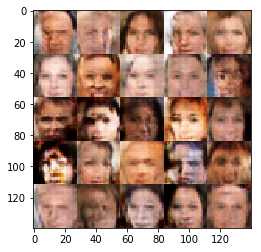

Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.5231... Generator Loss: 0.4225
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.7187
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.9792
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 1.0625
Epoch 1/1... Discriminator Loss: 1.2690... Generator Loss: 0.9067
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.7918
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.7155
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 0.8175


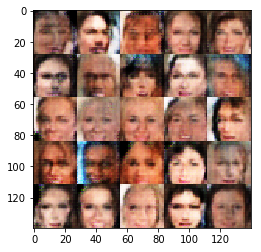

Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.9447
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.6972
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.7577
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.9195
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 0.8776


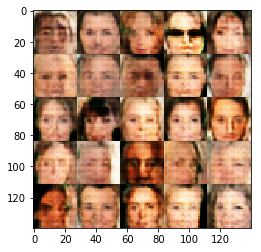

Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.2350... Generator Loss: 0.8524
Epoch 1/1... Discriminator Loss: 1.3415... Generator Loss: 0.8137
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.8407
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.8910
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 1.0628
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.9430


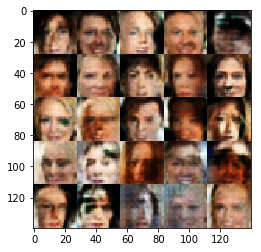

Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 1.5490
Epoch 1/1... Discriminator Loss: 1.4737... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.8667
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.2695... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.7909
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.2624... Generator Loss: 0.7940
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 0.9526


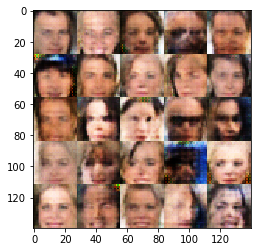

Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.8756
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.2914... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 1.0296
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.8546


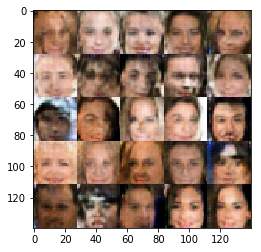

Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.9652
Epoch 1/1... Discriminator Loss: 1.2521... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.5316
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.9718
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 1.0950
Epoch 1/1... Discriminator Loss: 1.2014... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 1.2351


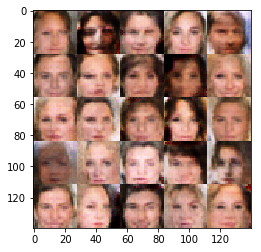

Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.8485
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7708
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.7987


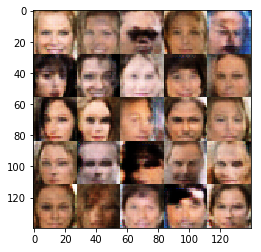

Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 0.9202
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.4886... Generator Loss: 1.1421
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.7760


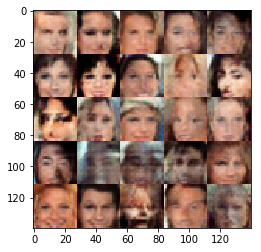

Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.7594
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.8874
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 1.0158


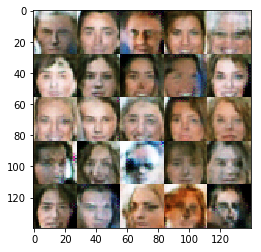

Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.7969
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6700
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 0.7914
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.9356


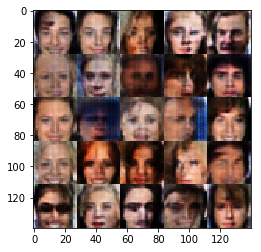

Epoch 1/1... Discriminator Loss: 1.2479... Generator Loss: 0.7924
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7865
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 1.3102... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.8399


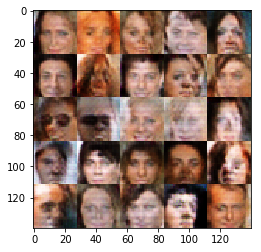

Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.8790
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 1.2952... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.8683
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 0.7775


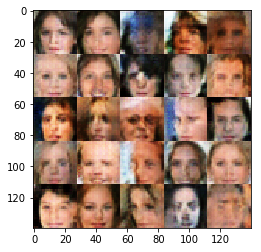

Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.9594
Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.7900
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.7362
Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.8324


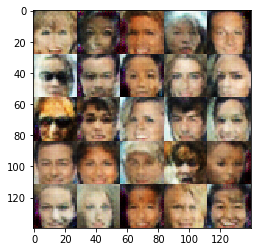

Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.8402
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.8815
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.8143
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.2729... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.7756


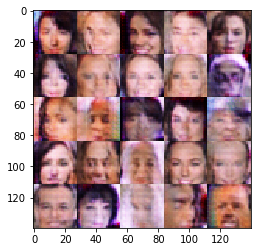

Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.7035
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.8099
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.6256


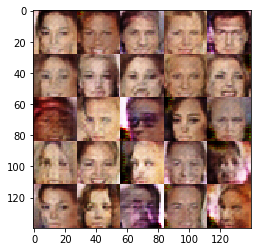

Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 0.8468
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.8153


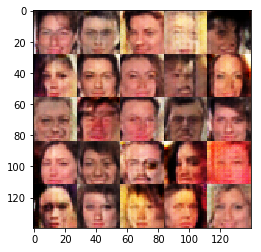

Epoch 1/1... Discriminator Loss: 1.1670... Generator Loss: 0.9429
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.7228
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.8329
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.7123
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.8093
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 0.8139
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.8854


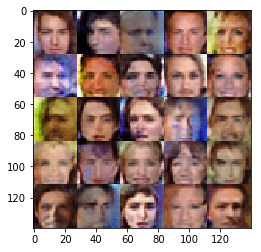

Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.8477
Epoch 1/1... Discriminator Loss: 1.3362... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 0.8995
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.8985
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.8727
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.7698
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.7260


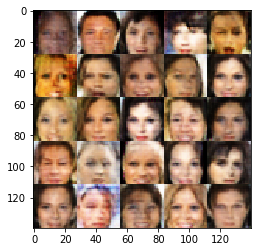

Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.2522... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.8009
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 0.8551
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.0621... Generator Loss: 0.9506


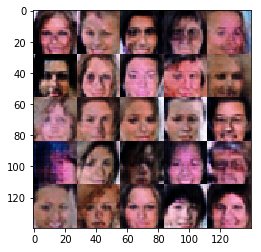

Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 0.9160
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 1.1130
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.7068
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.9489
Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.8360
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.7478


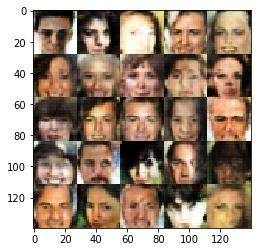

Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.8274


KeyboardInterrupt: 

In [13]:
batch_size = 64
z_dim = 64
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.